# Prediction using Unsupervised ML

**TASK**

* From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. 

* The Given task will be performed with the help of Python and relevant packages.

* Clustering Algorithms like KMeans will be useful in grouping these IRIS into their respective groups

## DATA

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df = pd.read_csv("Iris.csv",index_col="Id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


The Dataset consists of 150 entries,4 feature columns and 1 target column,
* SepalLength(in Cm)
* SepalWidth(in Cm)
* PetalLength(in Cm)
* PetalWidth(in Cm)
* Species - A column that labels the entry.

All **feature columns are of float datatype** and **the target column is object datatype**.

In [3]:
print("No.of missing values:\n" + str(df.isnull().sum()))

No.of missing values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


There are no missing values in the dataset

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## Exploratory Data Analysis

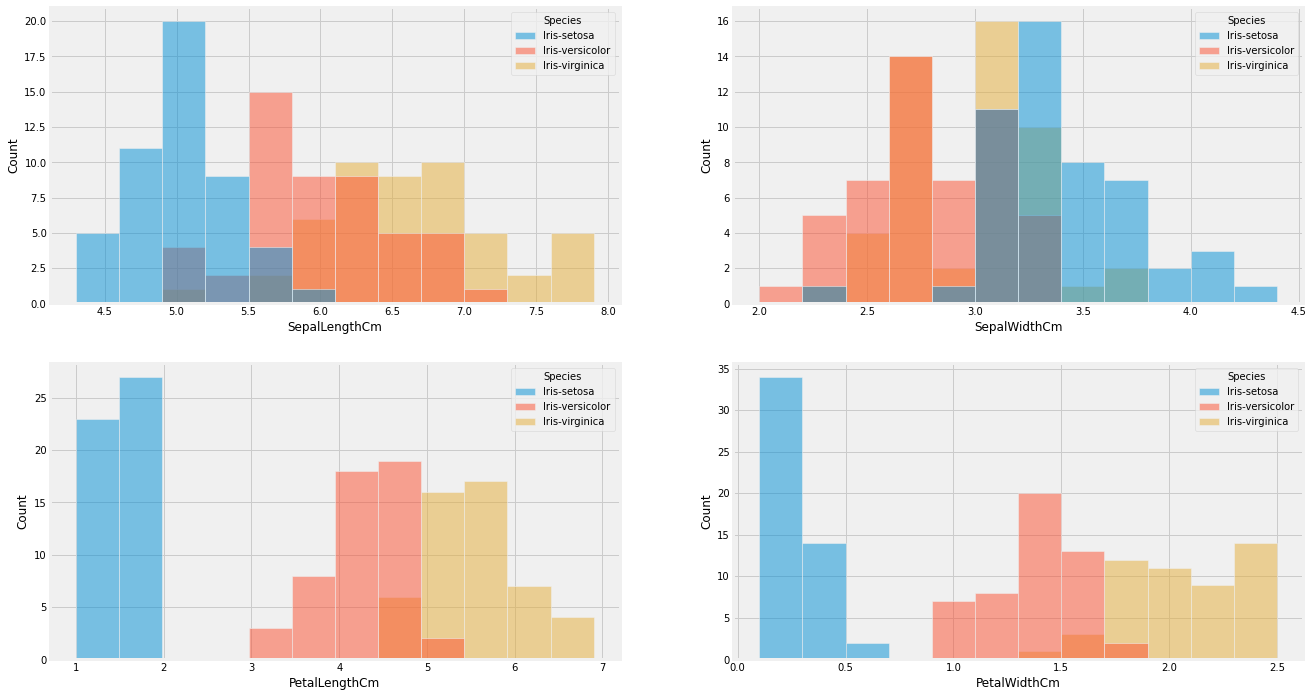

In [7]:
plt.figure(figsize=(20,12))
n=0
for col in ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]:
  n += 1
  plt.subplot(2,2,n)
  sns.histplot(data = df,x=col,hue='Species',bins=12)
plt.show()

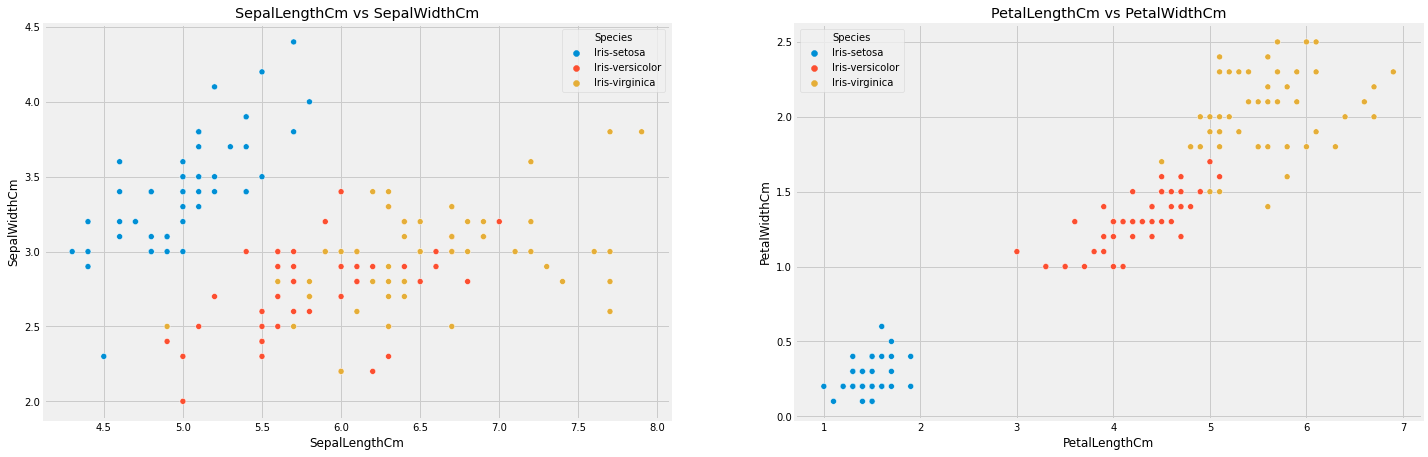

In [8]:
plt.figure(figsize=(22,16))
n = 0
for cols in [["SepalLengthCm","SepalWidthCm"],["PetalLengthCm","PetalWidthCm"]]:
  n += 1
  plt.subplot(2,2,n)
  sns.scatterplot(x = df[cols[0]],y = df[cols[1]],hue=df["Species"])
  plt.title("{} vs {}".format(cols[0],cols[1]))
  plt.xlabel(cols[0])
  plt.ylabel(cols[1])
plt.show()

Iris Setosa shows a clear difference in both Sepal and Petal Dimensions, but the same is not the case for Iris Versicolor and Virginica

## Clustering

In [9]:
X = df.iloc[:,:-1].values

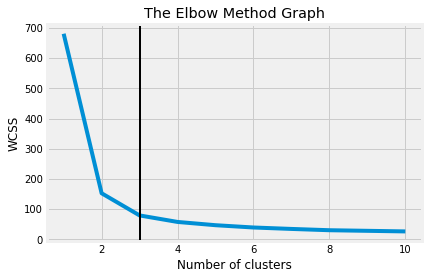

In [10]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11): 
  kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.axvline(3,c = 'black',linewidth=2)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow point in "3", so we will use n_clusters = 3

In [11]:
model = KMeans(n_clusters=3, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
y_kmeans = model.fit_predict(X)

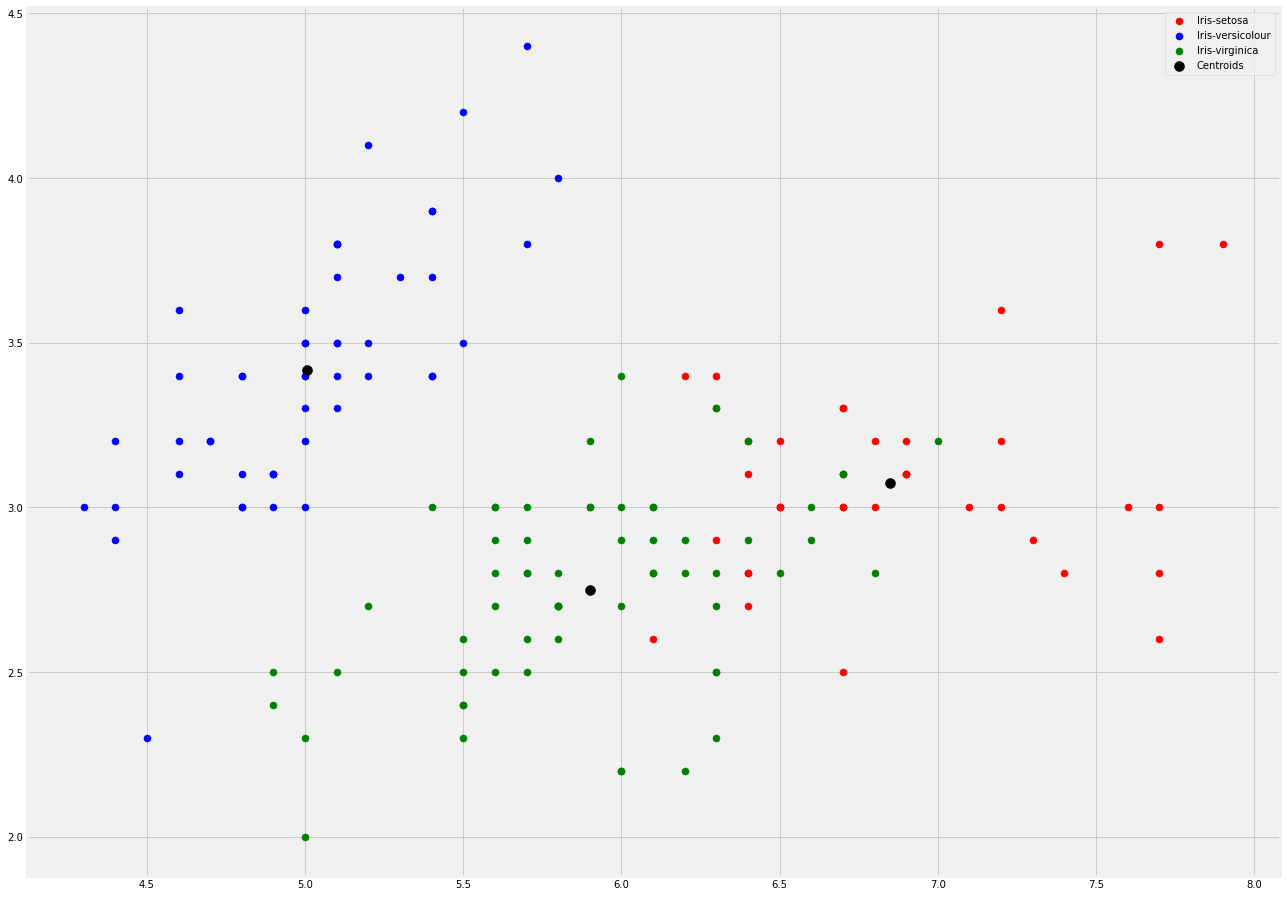

In [12]:
plt.figure(figsize=(20,16))
#Visualise the Clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 50, c = 'r', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 50, c = 'b', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 50, c = 'g', label = 'Iris-virginica')
#Plot Centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.legend()

3 is the optimum number of clusters for this problem